# Predicting categories with K-Nearest Neighbors

**Aim**: The aim of this notebook is to predict if a mobile transaction is fraudulent  by using the K-NN algorithm with scikit-learn.


## Package Requirements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


Step 1: Collect features and target from dataset and split dataset into train and test




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
features = iris.data
target = iris.target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

Step2: Bulid a KNN classifier with number of neighbors = 15

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=15)

Step 3: Train a KNN model

In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

Step 4: Predict 

In [ ]:
knn_classifier.predict(X_test)

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0,
       2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2,
       2])

Step 5: Calculate accuracy

In [ ]:
knn_classifier.score(X_test, y_test)

0.7111111111111111

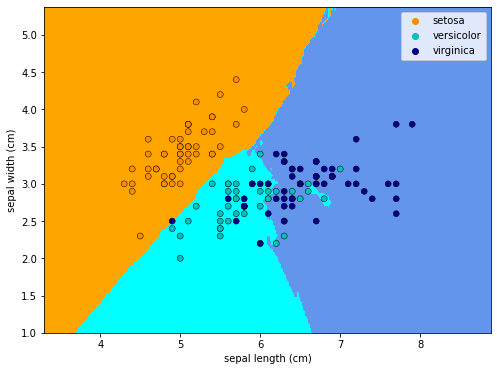

In [ ]:
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']


# we create an instance of Neighbours Classifier and fit the data.
knn_classifier.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

Standarization

Standarization is described as Z-score normalization in Wikipedia feature scaling page. Yes right, you might already notice that this is one of statistics terminologies, making data values of each feature in data to have zero-mean (when subtracting the mean in the numerator) and unit-variance (the standard variation is one).

In [57]:
# apply StandardScaler for iris data set, this is z-score normalization
from sklearn.preprocessing import StandardScaler
X_train_s = X_train.copy()
X_test_s = X_test.copy()
std_scaler = StandardScaler()
X_train_s = std_scaler.fit_transform(X_train)
X_test_s = std_scaler.fit_transform(X_test)

Normalization

Here’s a confusion. The terminology normalization implies the normal distribution, however normalization in this context is totally different concept. Normalization is described as Rescaling (min-max normalization) in Wikipedia feature scaling page. Normalization is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. In default, rescaling the range in [0, 1] is applied by the general fomula. Let’s take a look how we can code it.

In [58]:
# apply MinMaxScaler for iris data set, [0, 1] for the range
from sklearn.preprocessing import MinMaxScaler
X_train_n = X_train.copy()
X_test_n = X_test.copy()
min_max_scaler = MinMaxScaler()
X_train_n = min_max_scaler.fit_transform(X_train)
X_test_n = std_scaler.fit_transform(X_test)


Apply K nearest neighbors classifier to standarized data 


In [60]:
knn_classifier.fit(X_train_s, y_train)
knn_classifier.predict(X_test_s)
knn_classifier.score(X_test_s, y_test)


0.9111111111111111

Apply K nearest neighbors classifier to normalized data 

In [61]:
knn_classifier.fit(X_train_n, y_train)
knn_classifier.predict(X_test_n)
knn_classifier.score(X_test_n, y_test)

0.8666666666666667